In [176]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
from datetime import date, timedelta

d1 = date(2020,11,22)
d2 = date(2020,11,22)


dd = [d1 + timedelta(days=x) for x in range((d2-d1).days + 1)][::-1]
rows = 0
df = pd.DataFrame(columns = ['Date','TD', 'YD', 'Release', 'Daily', '%+-YD', '%+-LW', 'Theatre', 'Avg', 'To Date', 'Days', 'Distributor'])
for date in dd:
    #print(str(date))
    source = requests.get('https://www.boxofficemojo.com/date/'+str(date)+'/').text
    soup = BeautifulSoup(source, 'lxml')

    table = soup.find('table')

    data = table.find_all('tr')

    master_list = []
    for row in data:
        #print(row.text)
        row_list = [date]
        for entry in row.find_all('td'):
            if entry.text == 'false' or entry.text == 'true':
                continue
            row_list.append(entry.text)

        if len(row_list) == 12:
            master_list.append(row_list)

    #print(master_list)
    for i in range(len(master_list)):
        df.loc[rows] = master_list[i]
        rows += 1

df

,Date,TD,YD,Release,Daily,%+-YD,%+-LW,Theatre,Avg,To Date,Days,Distributor
0,2020-11-22,1,1,Freaky,"$306,260",-46%,-57.3%,"2,057",$148,"$5,653,445",10,Universal Pictures\n\n
1,2020-11-22,2,2,The War with Grandpa,"$202,049",-41.8%,-41.8%,"1,688",$119,"$16,196,728",45,101 Studios\n\n
2,2020-11-22,3,3,Let Him Go,"$177,245",-44.6%,-54.8%,"1,907",$92,"$7,943,440",17,Focus Features\n\n
3,2020-11-22,4,4,Come Play,"$139,565",-47%,-39.5%,"1,364",$102,"$8,067,170",24,Focus Features\n\n
4,2020-11-22,5,6,Honest Thief,"$110,649",-45.3%,-38.3%,"1,254",$88,"$13,004,419",45,Open Road Films (II)\n\n
5,2020-11-22,6,5,The Santa Clause2020 Re-release,"$106,000",-48.5%,-,"1,581",$67,"$461,000",3,Walt Disney Studios Motion Pictures\n\n
6,2020-11-22,7,7,Vanguard,"$97,652",-37%,-,"1,375",$71,"$380,428",3,Gravitas Ventures\n\n
7,2020-11-22,8,9,The Last Vermeer,"$55,891",-34.8%,-,912,$61,"$225,691",3,TriStar Pictures\n\n
8,2020-11-22,9,10,Elf2020 Re-release,"$50,000",-37.5%,+42.9%,259,$193,"$353,568",10,New Line Cinema\n\n
9,2020-11-22,10,11,True to the Game 2,"$46,852",-30.8%,-45%,216,$216,"$993,782",17,Faith Media Distribution\n\n


In [149]:
import gtab
import numpy as np
df.loc[:, 'google trends'] = 0
for movie in df['Release'].unique():
    try:
        t = gtab.GTAB();
        t.set_options(pytrends_config={"timeframe": f"{str(d1)} {str(d2)}"}); 
        query = t.new_query(movie);
        for date in query.index:
            print(query.loc[date, 'max_ratio'])
            df.loc[df['Release'].eq(movie) & df['Date'].eq(date), 'google trends'] = query.loc[date, 'max_ratio']
    except:
        continue
df  

Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Freaky'
New query calibrated!
4.682539682539683
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The War with Grandpa'
New query calibrated!
0.73
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.

Keyword Pray: The Story of Patrick Peyton is bad!
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'The Call'
New query calibrated!
21.720054560777065
Using directory 'C:\Users\nclan\Anaconda3\lib\site-packages\gtab'
Active anchorbank changed to: google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv

Using C:\Users\nclan\Anaconda3\lib\site-packages\gtab\output\google_anchorbanks\google_anchorbank_geo=_timeframe=2019-01-01 2020-08-01.tsv
New query 'Words on Bathroom Walls'
Could not calibrate. Time series for query too low everywhere.


,Date,TD,YD,Release,Daily,%+-YD,%+-LW,Theatre,Avg,To Date,Days,Distributor,google trends
0,2020-11-22,1,1,Freaky,"$306,260",-46%,-57.3%,"2,057",$148,"$5,653,445",10,Universal Pictures\n\n,4.682540
1,2020-11-22,2,2,The War with Grandpa,"$202,049",-41.8%,-41.8%,"1,688",$119,"$16,196,728",45,101 Studios\n\n,0.730000
2,2020-11-22,3,3,Let Him Go,"$177,245",-44.6%,-54.8%,"1,907",$92,"$7,943,440",17,Focus Features\n\n,1.075269
3,2020-11-22,4,4,Come Play,"$139,565",-47%,-39.5%,"1,364",$102,"$8,067,170",24,Focus Features\n\n,4.285714
4,2020-11-22,5,6,Honest Thief,"$110,649",-45.3%,-38.3%,"1,254",$88,"$13,004,419",45,Open Road Films (II)\n\n,1.234568
5,2020-11-22,6,5,The Santa Clause2020 Re-release,"$106,000",-48.5%,-,"1,581",$67,"$461,000",3,Walt Disney Studios Motion Pictures\n\n,0.000000
6,2020-11-22,7,7,Vanguard,"$97,652",-37%,-,"1,375",$71,"$380,428",3,Gravitas Ventures\n\n,10.582011
7,2020-11-22,8,9,The Last Vermeer,"$55,891",-34.8%,-,912,$61,"$225,691",3,TriStar Pictures\n\n,0.480000
8,2020-11-22,9,10,Elf2020 Re-release,"$50,000",-37.5%,+42.9%,259,$193,"$353,568",10,New Line Cinema\n\n,0.000000
9,2020-11-22,10,11,True to the Game 2,"$46,852",-30.8%,-45%,216,$216,"$993,782",17,Faith Media Distribution\n\n,0.420000


In [177]:
df.columns
df = df.replace(',','', regex=True)
df = df.replace('-', np.nan)
df['Daily'] = df.Daily.apply(lambda x: x.strip('$')).astype(float)
df['%+-YD'] = df['%+-YD'].apply(lambda x: x.strip('%')).astype(float)
#df['%+-LW'] = df['%+-LW'].apply(lambda x: x.strip('%'))
df['Avg'] = df['Avg'].apply(lambda x: x.strip('$')).astype(float)
df['To Date'] = df['To Date'].apply(lambda x: x.strip('$')).astype(float)
df['Theatre'] = df['Theatre'].astype(int)
df['Days'] = df['Days'].astype(int)


df.head()

,Date,TD,YD,Release,Daily,%+-YD,%+-LW,Theatre,Avg,To Date,Days,Distributor
0,2020-11-22,1,1,Freaky,306260.0,-46.0,-57.3%,2057,148.0,5653445.0,10,Universal Pictures\n\n
1,2020-11-22,2,2,The War with Grandpa,202049.0,-41.8,-41.8%,1688,119.0,16196728.0,45,101 Studios\n\n
2,2020-11-22,3,3,Let Him Go,177245.0,-44.6,-54.8%,1907,92.0,7943440.0,17,Focus Features\n\n
3,2020-11-22,4,4,Come Play,139565.0,-47.0,-39.5%,1364,102.0,8067170.0,24,Focus Features\n\n
4,2020-11-22,5,6,Honest Thief,110649.0,-45.3,-38.3%,1254,88.0,13004419.0,45,Open Road Films (II)\n\n


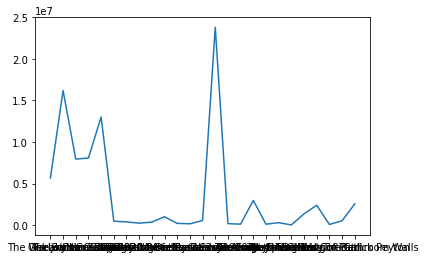

In [178]:
import matplotlib.pyplot as plt
plt.plot(df['Release'], df['To Date'])